In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pybedtools import BedTool

In [37]:
data = pd.read_csv("../H3K27me3/bw/subsampleHimericBam.chr22_pasio.bdg", header=None, sep="\t")

In [38]:
data.head()

,0,1,2,3,4,5
0,chr22,16050299,16054117,1.921949,3818,-6108.076768
1,chr22,16054117,16054234,10.982906,117,-396.229150
2,chr22,16054234,16056243,4.283723,2009,-5598.786843
3,chr22,16056243,16056334,17.879121,91,-361.478345
4,chr22,16056334,16056926,3.613176,592,-1636.888911


In [39]:
#Размер 22 хромосомы - 51304566
data.shape

(11831, 6)

In [47]:
data[data[3] > 50]

,0,1,2,3,4,5
890,chr22,18507188,18507229,58.658537,41,-136.991364
893,chr22,18507557,18507650,54.086022,93,-293.301471
896,chr22,18507874,18507966,59.619565,92,-290.181000
901,chr22,18508605,18508681,55.447368,76,-264.582021
937,chr22,18518485,18518584,57.151515,99,-316.192994
939,chr22,18518822,18518989,50.598802,167,-529.836001
3075,chr22,23338356,23338420,51.062500,64,-210.542102
4416,chr22,27095331,27095383,52.307692,52,-177.768797
8313,chr22,39182234,39182330,50.572917,96,-308.926452
8324,chr22,39184317,39184498,59.419890,181,-584.082459


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 

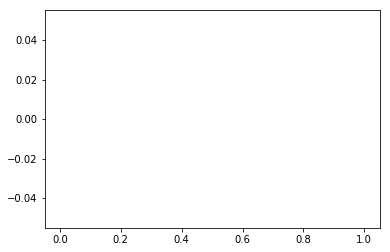

In [41]:
plt.hist([i for i in data[3] if i > 100], bins=100)

In [104]:
peaks = pd.read_csv("../H3K27me3/peaks/ENCFF918UGT_peaks.bed", sep="\t", skiprows=1, header=None)

In [105]:
peaks

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,870371,878733,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,874440,877976,0,2,"248,498","4069,7107",0.0,0.0,0.0
1,chr1,905039,911984,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,906246,911984,0,6,"286,414,225,226,290,344","1207,1642,2123,3238,6123,6601",0.0,0.0,0.0
2,chr1,966876,975664,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,968738,969720,0,2,"295,653","1862,2191",0.0,0.0,0.0
3,chr1,991510,1001196,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,993570,999409,0,3,"401,219,254","2060,3105,7645",0.0,0.0,0.0
4,chr1,1002160,1011125,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1004020,1004368,0,1,348,1860,0.0,0.0,0.0
5,chr1,1070377,1073521,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1073257,1073521,0,1,264,2880,0.0,0.0,0.0
6,chr1,1076286,1077479,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1077273,1077479,0,1,206,987,0.0,0.0,0.0
7,chr1,1097055,1109750,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1097312,1109410,0,2,"263,267","257,12088",0.0,0.0,0.0
8,chr1,1117584,1119350,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1118622,1118855,0,1,233,1038,0.0,0.0,0.0
9,chr1,1225559,1226764,../H3K27me3/peaks/ENCFF918UGT_peaks.bed_broadR...,0,.,1225559,1225820,0,1,261,0,0.0,0.0,0.0


In [31]:
chr22_peaks = peaks[peaks[0] == 'chr22']

In [ ]:
for f in os.listdir("../H3K27me3/peaks"):
    print(f)
    if(f.endswith("bed")):
        try:
            peaks = pd.read_csv("../H3K27me3/peaks/" + f, sep="\t", skiprows=1, header=None)
            peaks[peaks[0] == 'chr22'][[0, 1, 2]].to_csv("../H3K27me3/peaks/chr22/chr22_" + f, header=None, sep="\t", index=None)
            
            with open("../H3K27me3/peaks/chr22/chr22_" + f, 'r') as original: data = original.read()
            with open("../H3K27me3/peaks/chr22/chr22_" + f, 'w') as modified: modified.write("track name='" + f + "' description='User Supplied Track'\n" + data)
            
        except pd.errors.EmptyDataError:
            print("empty " + f)

In [ ]:
#1. Делаем compliment ко всем старым пикам(не нужно, достаточно intersect - v!!)
#2. Находим пики во всех образцах, которые лежат только в этом комплименте(intersect -v)
#3. Делаем merge этих пиков
#4. Изучаем их на предмет слишком длинных пиков

In [18]:
old_peaks = pd.read_csv("../H3K27me3/bw/subsampleHimericBam_peaks.bed", sep="\t", skiprows=1, header=None)

In [19]:
old_peaks_bed = BedTool("../H3K27me3/bw/subsampleHimericBam_peaks.bed")
old_peaks_bed.complement(genome='hg19', output="../H3K27me3/new_peaks/subsampleHimericBam_peaks_hg19_complement.bed")

<BedTool(../H3K27me3/new_peaks/subsampleHimericBam_peaks_hg19_complement.bed)>

In [21]:
b = BedTool("../H3K27me3/bw/subsampleHimericBam_peaks.bed")# old_peaks
for f in os.listdir("../H3K27me3/peaks"):
    print(f)
    if(f.endswith("bed")):
        try:
            a = BedTool("../H3K27me3/peaks/" + f)#experiment peaks
            a.intersect(b, v=True, output="../H3K27me3/new_peaks/" + f)
        except pd.errors.EmptyDataError:
            print("empty " + f)


ENCFF271PHI_peaks.bed
ENCFF488SNL_peaks.bed
ENCFF454NHC_peaks.bed
ENCFF484EGJ_peaks.bed
ENCFF609FSU_peaks.bed
ENCFF834KFN_peaks.bed
ENCFF891EGG_peaks.bed
ENCFF323ZZH_peaks.bed
ENCFF767TKI_peaks.bed
ENCFF808YRG_peaks.bed
ENCFF372PLV_peaks.bed
ENCFF337XEV_peaks.bed
ENCFF047KBD_peaks.bed
ENCFF379GQG_peaks.bed
ENCFF535KYM_peaks.bed
ENCFF956AVR_peaks.bed
ENCFF822OQW_peaks.bed
ENCFF582KHS_peaks.bed
ENCFF360FJT_peaks.bed
ENCFF959JAQ_peaks.bed
ENCFF591ZGI_peaks.bed
ENCFF897XTJ_peaks.bed
ENCFF683IVJ_peaks.bed
ENCFF876PEW_peaks.bed
ENCFF276TZX_peaks.bed
ENCFF399YFM_peaks.bed
ENCFF133ZMV_peaks.bed
ENCFF622QTG_peaks.bed
ENCFF676ORH_peaks.bed
ENCFF803QNX_peaks.bed
chr22
ENCFF721TIG_peaks.bed
ENCFF590MNF_peaks.bed
ENCFF730WFM_peaks.bed
ENCFF149NHO_peaks.bed
ENCFF760XGT_peaks.bed
ENCFF745JZS_peaks.bed
ENCFF346ZGG_peaks.bed
ENCFF313IEC_peaks.bed
ENCFF043MFS_peaks.bed
ENCFF800CCA_peaks.bed
ENCFF480ERS_peaks.bed
ENCFF911FUL_peaks.bed
ENCFF100ZMU_peaks.bed
ENCFF315OGP_peaks.bed
ENCFF573NUY_peaks.bed
ENCF

In [23]:
files = ["../H3K27me3/new_peaks/" + f for f in os.listdir("../H3K27me3/new_peaks") if f.startswith("ENC")]
x = BedTool(files[0])
x.cat(*files[1:], force_truncate=True, output="../H3K27me3/new_peaks/merged_peaks.bed")

<BedTool(../H3K27me3/new_peaks/merged_peaks.bed)>

In [2]:
#Смержим пики без вычитания old_peaks
files = ["../H3K27me3/peaks/" + f for f in os.listdir("../H3K27me3/peaks") if f.startswith("ENC")]
x = BedTool(files[0])
x.cat(*files[1:], force_truncate=True, output="../H3K27me3/peaks/merged_peaks.bed")

<BedTool(../H3K27me3/peaks/merged_peaks.bed)>

In [3]:
mp = pd.read_csv("../H3K27me3/peaks/merged_peaks.bed", sep="\t", header=None)

In [4]:
mp.shape

(277972, 3)

In [5]:
nmp = pd.read_csv("../H3K27me3/new_peaks/merged_peaks.bed", sep="\t", header=None)

In [6]:
nmp.shape

(402786, 3)

In [29]:
mp[mp[0] == 'chr22'].to_csv("../H3K27me3/new_peaks/chr22_merged_peaks.bed", header=None, sep="\t", index=None)

In [28]:
chr22_peaks.shape

(4190, 3)

In [13]:
mp[mp[2]-mp[1] > 700000]

,0,1,2
1130,chr1,18463401,19229796
32791,chr10,125097398,125869607
83755,chr15,70067599,70911865
89054,chr16,54262061,55268038
95171,chr17,46198698,46907064
121407,chr2,121054662,121864667
138361,chr20,55110299,55927723
138369,chr20,55958478,56823238
143167,chr22,26105589,26846367
143199,chr22,27169772,28067870


In [47]:
len([l for l in lengths if l < 10000])

357535

In [42]:
len([l for l in lengths if l > 10000])

45248

In [52]:
[l for l in lengths if l > 200000]

[225369]

(array([67560., 16769., 12695., 12211., 11617.,  9482.,  7934.,  7027.,
         6374.,  5782.,  5078.,  4643.,  4370.,  3967.,  3597.,  3356.,
         3219.,  2957.,  2703.,  2527.,  2428.,  2355.,  2065.,  1945.,
         1948.,  1739.,  1678.,  1716.,  1608.,  1443.,  1408.,  1276.,
         1351.,  1229.,  1230.,  1156.,  1164.,  1114.,  1023.,   974.,
         1001.,   895.,   900.,   841.,   808.,   822.,   835.,   745.,
          724.,   736.]),
 array([ 200.  ,  395.98,  591.96,  787.94,  983.92, 1179.9 , 1375.88,
        1571.86, 1767.84, 1963.82, 2159.8 , 2355.78, 2551.76, 2747.74,
        2943.72, 3139.7 , 3335.68, 3531.66, 3727.64, 3923.62, 4119.6 ,
        4315.58, 4511.56, 4707.54, 4903.52, 5099.5 , 5295.48, 5491.46,
        5687.44, 5883.42, 6079.4 , 6275.38, 6471.36, 6667.34, 6863.32,
        7059.3 , 7255.28, 7451.26, 7647.24, 7843.22, 8039.2 , 8235.18,
        8431.16, 8627.14, 8823.12, 9019.1 , 9215.08, 9411.06, 9607.04,
        9803.02, 9999.  ]),
 <a list of 50 Pa

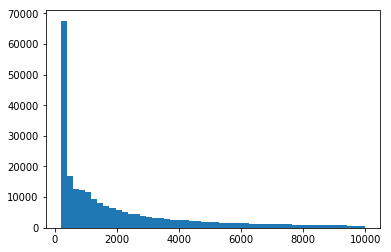

In [36]:
plt.hist([l for l in (mp[2] - mp[1]) if l < 10000], bins=50)

In [62]:
old_peaks.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,801525,802577,subsampleHimericBam_peaks.bed_broadRegion2,0,.,801577,802574,0,2,"304,206","52,843",0.0,0.0,0.0
1,chr1,804282,806294,subsampleHimericBam_peaks.bed_broadRegion3,0,.,804289,806285,0,3,"313,276,888","7,627,1115",0.0,0.0,0.0
2,chr1,807213,810961,subsampleHimericBam_peaks.bed_broadRegion4,0,.,807623,810958,0,4,"302,299,548,387","410,1336,2658,3358",0.0,0.0,0.0
3,chr1,814722,826652,subsampleHimericBam_peaks.bed_broadRegion5,0,.,814748,826348,0,8,"307,262,276,572,240,2046,1786,636","26,2215,2872,3467,5223,5849,8892,10990",0.0,0.0,0.0
4,chr1,828257,828984,subsampleHimericBam_peaks.bed_broadRegion6,0,.,828739,828982,0,1,243,482,0.0,0.0,0.0


In [63]:
old_lengths = old_peaks[2] - old_peaks[1]

(array([7.2498e+04, 1.1288e+04, 3.2860e+03, 1.2820e+03, 6.4500e+02,
        3.7200e+02, 2.0600e+02, 1.3500e+02, 9.6000e+01, 5.1000e+01,
        4.8000e+01, 3.6000e+01, 2.5000e+01, 1.9000e+01, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+01, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.0600000e+02, 5.4132800e+03, 1.0620560e+04, 1.5827840e+04,
        2.1035120e+04, 2.6242400e+04, 3.1449680e+04, 3.6656960e+04,
        4.1864240e+04, 4.7071520e+04, 5.2278800e+04, 5.7486080e+04,
        6.2693360e+04, 6.7900640e+04, 7.3107920e+04, 7.8315200e+04,
        8.3522480e+04, 8.8729760e+04, 9.393704

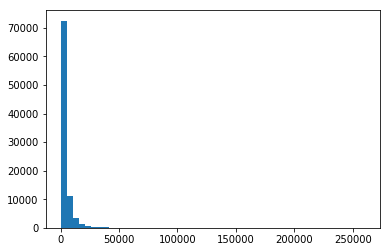

In [64]:
plt.hist([l for l in old_lengths], bins=50)

In [67]:
old_peaks[old_peaks[2]-old_peaks[1] > 150000]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
11300,chr10,102463905,102640830,subsampleHimericBam_peaks.bed_broadRegion24391,0,.,102463906,102640014,0,49,"1344,21188,30816,5600,4963,854,566,721,4652,50...","1,1841,23196,54266,60270,65725,66747,67422,682...",0.0,0.0,0.0
19416,chr12,54273678,54481063,subsampleHimericBam_peaks.bed_broadRegion41618,0,.,54273680,54481062,0,35,"384,1226,380,219,2508,390,865,453,1230,5882,34...","2,773,2319,2828,3283,7031,7609,9497,10088,1157...",0.0,0.0,0.0
29851,chr15,89883405,90049597,subsampleHimericBam_peaks.bed_broadRegion65461,0,.,89884624,90049153,0,52,"885,997,559,1532,381,1469,311,1033,528,2075,30...","1219,2643,4644,5725,7485,8470,10197,10790,1221...",0.0,0.0,0.0
35387,chr17,32773665,32999378,subsampleHimericBam_peaks.bed_broadRegion76522,0,.,32773730,32997000,0,137,"578,1439,602,206,2793,442,596,275,3976,377,136...","65,808,2628,3849,5473,8820,9406,10107,10586,15...",0.0,0.0,0.0
35987,chr17,46590397,46850967,subsampleHimericBam_peaks.bed_broadRegion77427,0,.,46590407,46850963,0,60,"567,3256,1623,206,697,708,1479,12056,324,343,2...","10,738,4190,5931,6372,7189,8091,9717,22093,226...",0.0,0.0,0.0
37097,chr17,77229103,77459087,subsampleHimericBam_peaks.bed_broadRegion79643,0,.,77229105,77458030,0,103,"426,584,1275,771,422,2377,1150,1535,267,488,11...","2,1029,2093,3556,4504,5222,8083,9706,11689,121...",0.0,0.0,0.0
47727,chr2,176914768,177079046,subsampleHimericBam_peaks.bed_broadRegion102856,0,.,176914770,177078075,0,27,"363,530,427,346,495,206,1130,596,874,19749,271...","2,1271,3080,3701,5538,6169,6550,7859,8799,1052...",0.0,0.0,0.0
52678,chr20,61595447,61765700,subsampleHimericBam_peaks.bed_broadRegion113244,0,.,61597048,61765497,0,54,"238,290,503,459,2059,13945,1132,451,920,2031,9...","1601,2357,4603,5238,5933,8453,22692,23994,2463...",0.0,0.0,0.0
74007,chr7,27123909,27305384,subsampleHimericBam_peaks.bed_broadRegion166652,0,.,27124031,27302277,0,16,"287,28298,16103,69273,17871,12518,358,648,2268...","122,1256,29814,46079,115625,133796,146438,1477...",0.0,0.0,0.0


In [ ]:
#!!!посчитать пики без разделения на новые и старые!!!
#0)А вот мы так запросто слили все пики в образцах, а что же с нормализацией и прочим? может поэтому они потерялись?
#0a)Поискать MEG3 пики в новых пиках(посмотреть в геном браузере) 4415 пересекаются и 5154 из 6837 на расстоянии меньше 1000+
#1)Каков процент покрытия генома пиками? 0.5448, по хромосомам варьируется от 0.7 до 0.3, Y хромосома очень слабо покрыта+(только новые пики)
#2)Найти пики, которые пересекают гены и +/-1000 пн рядом с обоих сторон +
#2a)Есть ли гены без пиков?(и в слитых пиках и по разным экспериментам)
#3)Фильтровать blacklist
#4)Посчитать корреляции(не забыть пересчитать сколько в пиках ридов(плотность))
#5)Прочекать известные РНК
#6)надо ли выбрасывать эксперименты, где нет пиков - да + 
#7)подумать еще насчет бинарной корреляции(к пункту 10)
#8)Все же сливать пики с помощью сегментации?
#9)go analysis для заметелированных генов?
#10)посмотреть для больших регионов(>150к) это сборная солянка или есть во всех образцах?(попересекать с пиками экспериментов) относительно генов
#т.е. возможно надо говорить не о корреляции экспрессия-метрка, а о корреляции метелированный ген(с учетом промоторов) - наличие этой РНК
#11)Что насчет генов, которые всегда должны быть заметелированы? Возможно они нужны только при эмбриогенезе или есть знания
#об определенных тканях, или за это отвечает метелирование ДНК?
#12)Есть ли гены без пиков? Точнее гены, не заметелированные ни в одном образце

In [94]:
gene = []
for f in os.listdir("../H3K27me3/peaks"):
    if(f.endswith("bed")):
        try:
            p = pd.read_csv("../H3K27me3/peaks/" + f, sep="\t", skiprows=1, header=None)
            #chr1	208195289	208359693
            gene.append(p[(p[0] == "chr1")&(p[1] >= 208195000)&(p[2] <= 208360000)])
        except pd.errors.EmptyDataError:

ENCFF271PHI_peaks.bed
ENCFF488SNL_peaks.bed
empty ENCFF488SNL_peaks.bed
ENCFF454NHC_peaks.bed
ENCFF484EGJ_peaks.bed
ENCFF609FSU_peaks.bed
ENCFF834KFN_peaks.bed
ENCFF891EGG_peaks.bed
ENCFF323ZZH_peaks.bed
ENCFF767TKI_peaks.bed
ENCFF808YRG_peaks.bed
empty ENCFF808YRG_peaks.bed
ENCFF372PLV_peaks.bed
ENCFF337XEV_peaks.bed
ENCFF047KBD_peaks.bed
ENCFF379GQG_peaks.bed
ENCFF535KYM_peaks.bed
ENCFF956AVR_peaks.bed
ENCFF822OQW_peaks.bed
ENCFF582KHS_peaks.bed
ENCFF360FJT_peaks.bed
ENCFF959JAQ_peaks.bed
ENCFF591ZGI_peaks.bed
ENCFF897XTJ_peaks.bed
ENCFF683IVJ_peaks.bed
empty ENCFF683IVJ_peaks.bed
ENCFF876PEW_peaks.bed
ENCFF276TZX_peaks.bed
ENCFF399YFM_peaks.bed
ENCFF133ZMV_peaks.bed
ENCFF622QTG_peaks.bed
ENCFF676ORH_peaks.bed
ENCFF803QNX_peaks.bed
chr22
ENCFF721TIG_peaks.bed
ENCFF590MNF_peaks.bed
ENCFF730WFM_peaks.bed
ENCFF149NHO_peaks.bed
ENCFF760XGT_peaks.bed
ENCFF745JZS_peaks.bed
ENCFF346ZGG_peaks.bed
ENCFF313IEC_peaks.bed
ENCFF043MFS_peaks.bed
ENCFF800CCA_peaks.bed
ENCFF480ERS_peaks.bed
ENCFF911

In [95]:
gene_data = [(i.shape[0], sum(i[2] - i[1])) for i in gene]

In [96]:
#получается, что чем больше гена заметилированно, тем больше будет значение покрытия для него в эксперименте, типа мера уверенности
#что он метелирован, но вот экспрессия-то не так меняется?
gene_data

[(1, 263),
 (6, 4659),
 (0, 0),
 (0, 0),
 (2, 470),
 (8, 36106),
 (0, 0),
 (2, 1648),
 (4, 2466),
 (0, 0),
 (0, 0),
 (13, 18826),
 (1, 260),
 (22, 138422),
 (9, 14339),
 (2, 847),
 (16, 47929),
 (13, 16397),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (33, 89122),
 (0, 0),
 (1, 241),
 (18, 140992),
 (2, 3486),
 (1, 229),
 (0, 0),
 (6, 11533),
 (0, 0),
 (5, 11074),
 (0, 0),
 (0, 0),
 (1, 211),
 (22, 86925),
 (0, 0),
 (0, 0),
 (0, 0),
 (13, 39784),
 (0, 0),
 (3, 8330),
 (0, 0),
 (3, 5583),
 (0, 0),
 (0, 0),
 (2, 790),
 (19, 65647),
 (0, 0),
 (5, 4074),
 (1, 588),
 (0, 0),
 (3, 5832),
 (2, 1640),
 (2, 474),
 (0, 0),
 (32, 76340),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 229),
 (12, 26199),
 (0, 0),
 (4, 4687),
 (0, 0),
 (18, 102109),
 (0, 0),
 (2, 4595),
 (0, 0),
 (0, 0)]

In [1]:
import rpy2.robjects as robjects

In [4]:
r = robjects.r
r.source("PeaksAnnotation.R")

/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: grid

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: IRanges

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/mazurovev/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked f

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7f74fbfeab08 / R:0x2c6edf98>
[SignatureTranslatedFunc..., BoolVector]
  value: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x7f74fbfe96c8 / R:0x28cac188>
  visible: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x7f74fbfea208 / R:0x20747c8>
[       0]

In [ ]:
for f in os.listdir("../H3K27me3/peaks"):
    if(f.endswith("bed")):
        try:
            p = pd.read_csv("../H3K27me3/peaks/" + f, sep="\t", skiprows=1, header=None)
            p[[0, 1, 2, 3]].to_csv("~/H3K27me3/peaks/" + f, sep="\t", index=None, header=False)
            print(f)
            r.peaksAnno("~/H3K27me3/peaks/" + f, "~/H3K27me3/peaks/anno_" + f)
            data = pd.read_csv("../H3K27me3/peaks/anno_" + f, sep=";", index_col=0)
            data = data[data['insideFeature'].notnull()]
            data = data[data.feature.str.startswith('ENSG')]
            data.to_csv("~/H3K27me3/peaks/anno_" + f.split('.')[0] + ".csv", sep="\t", index=None, header=False)
            os.remove("../H3K27me3/peaks/anno_" + f)
        except pd.errors.EmptyDataError:
            print("empty " + f)

In [5]:
r.peaksAnno("~/H3K27me3/peaks/merged_peaks.bed", "~/H3K27me3/peaks/anno_merged_peaks.csv")
data = pd.read_csv("../H3K27me3/peaks/anno_merged_peaks.csv", sep=";", index_col=0)
data = data[data['insideFeature'].notnull()]
data = data[data.feature.str.startswith('ENSG')]
data.to_csv("~/H3K27me3/peaks/anno_merged_peaks.csv", sep="\t", index=None, header=False)

In [26]:
peaks_anno = pd.read_csv("../H3K27me3/peaks/anno_merged_peaks.csv", sep="\t", header=None)
new_peaks_anno = pd.read_csv("../H3K27me3/new_peaks/anno_merged_peaks.csv", sep="\t", header=None)

In [24]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr1,54316,55724,1409,*,X000001,ENSG00000268020,52473.0,54936.0,+,overlapEnd,1843.0,620.0,Overlapping
1,chr1,61835,62068,234,*,X000004,ENSG00000240361,62948.0,63887.0,+,upstream,-1113.0,880.0,Overlapping
2,chr1,64456,64692,237,*,X000005,ENSG00000240361,62948.0,63887.0,+,downstream,1508.0,569.0,Overlapping
3,chr1,87039,88835,1797,*,X000007,ENSG00000238009,89295.0,133566.0,-,downstream,46527.0,460.0,Overlapping
4,chr1,87039,88835,1797,*,X000007,ENSG00000239945,89551.0,91105.0,-,downstream,4066.0,716.0,Overlapping


In [33]:
#Как найти гены без пиков?
genes = set(peaks_anno[6].tolist())

In [34]:
#57952 всего генов в базе
len(genes)

53397

In [164]:
#посмотреть как соотносятся слитые пики и пики по экспериментам
#(чтобы оценить можно ли в образцах говорить о том что ген метелирован/нет)
data[data[5] == 'X078552']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
59555,chr12,69917642,69918927,1286,*,X078552,ENSG00000166225,69864129.0,69973562.0,+,inside,53513.0,53513.0,Overlapping


In [ ]:
#Делаем bed файл из файла аннотации
data = pd.read_csv("../H3K27me3/new_peaks/anno_merged_peaks.csv", sep="\t", header=None)
data[[0, 1, 2, 5]].drop_duplicates().to_csv("../H3K27me3/new_peaks/merged_peaks_around_genes.bed", sep="\t", header=None, index=False)

In [10]:
#ищем MEG3 пики в новых слитых пиках
new_peaks = BedTool("../H3K27me3/new_peaks/merged_peaks.bed")

In [11]:
meg3 = BedTool("../H3K27me3/MEG3-bound_peaks_hg19based.bed")

In [15]:
len(meg3)

6837

In [13]:
closest = meg3.sort().closest(new_peaks.sort(), d=True).to_dataframe()

In [21]:
closest[closest['thickEnd'] < 1000].shape

(5154, 8)

In [28]:
#процент покрытия: считаем как длина хромосомы, деленная на количество бп, которые покрывают пики
chrom_sizes = {'chr1':249250621, 'chr2':243199373,'chr3':198022430,'chr4':191154276,'chr5':180915260,'chr6':171115067,
'chr7':159138663,'chrX':155270560,'chr8':146364022,'chr9':141213431,'chr10':135534747,'chr11':135006516,
'chr12':133851895,'chr13':115169878,'chr14':107349540,'chr15':102531392,'chr16':90354753,'chr17':81195210,
'chr18':78077248,'chr20':63025520,'chrY':59373566,'chr19':59128983,'chr22':51304566,'chr21':48129895}

new_peaks = pd.read_csv("../H3K27me3/peaks/merged_peaks.bed", sep="\t", header=None)

In [29]:
#Посчитать для старых пиков так же
chroms_occupation_np = {}
summ_np = 0;
for ch in chrom_sizes.keys():
    summ_np = summ_np + sum(new_peaks[new_peaks[0] == ch][2] - new_peaks[new_peaks[0] == ch][1])
    chroms_occupation_np[ch] = sum(new_peaks[new_peaks[0] == ch][2] - new_peaks[new_peaks[0] == ch][1])/chrom_sizes[ch]

In [32]:
chroms_occupation_np

{'chr1': 0.6896619206417143,
 'chr2': 0.7487032871585569,
 'chr3': 0.7478467262521725,
 'chr4': 0.7454133905955627,
 'chr5': 0.7482469416897171,
 'chr6': 0.7530326946603715,
 'chr7': 0.7410157706301705,
 'chrX': 0.8197744053991948,
 'chr8': 0.7910230152051985,
 'chr9': 0.6101932825355685,
 'chr10': 0.7597144074057998,
 'chr11': 0.7714939995933233,
 'chr12': 0.7452918765176989,
 'chr13': 0.614596292270102,
 'chr14': 0.6243050692159463,
 'chr15': 0.5924990953014663,
 'chr16': 0.6915495413949059,
 'chr17': 0.7399281928084182,
 'chr18': 0.7709998052185446,
 'chr20': 0.7934995855647046,
 'chrY': 0.05598452685156219,
 'chr19': 0.77982675602589,
 'chr22': 0.5448195195725855,
 'chr21': 0.5667973096554647}

In [ ]:
#Взять новые пики(слитые и рядом/в генах), пересчитать в них плотность в кажом образце - MakeCoverageInPeaks +
#Нормализовать чип +
#Бинаризировать экспрессию - как?
#Бинаризировать пики - как?
#посчитать бинарную корреляцию(а потом посмотреть как соотносятся значения корреляций для разных пиков в одном гене)
#просто посчитать корреляцию
#сделать go(типа него) анализ
#Посмотреть пересечения с MEG3 пиками(пар)+ - только 40 новых, даже с учетом того что у нас пары только вокруг генов - мало
#Посмотреть на известные нам РНК(и в базе) в наших парах
#Посмотреть Фантомовские нкРНК+

In [ ]:
#Посчитать корреляцию эксперименталных пиков MEG3(берем их области, но наши данные)
#Значимость пересечения

In [ ]:
#!!!посчитать пики без разделения на новые и старые!!!
#0)А вот мы так запросто слили все пики в образцах, а что же с нормализацией и прочим? может поэтому они потерялись?
#0a)Поискать MEG3 пики в новых пиках(посмотреть в геном браузере) 4415 пересекаются и 5154 из 6837 на расстоянии меньше 1000+
#1)Каков процент покрытия генома пиками? 0.5448, по хромосомам варьируется от 0.7 до 0.3, Y хромосома очень слабо покрыта+(только новые пики)
#2)Найти пики, которые пересекают гены и +/-1000 пн рядом с обоих сторон +
#2a)Есть ли гены без пиков?(и в слитых пиках и по разным экспериментам)
#3)Фильтровать blacklist
#4)Посчитать корреляции(не забыть пересчитать сколько в пиках ридов(плотность))
#5)Прочекать известные РНК
#6)надо ли выбрасывать эксперименты, где нет пиков - да + 
#7)подумать еще насчет бинарной корреляции(к пункту 10)
#8)Все же сливать пики с помощью сегментации?
#9)go analysis для заметелированных генов?
#10)посмотреть для больших регионов(>150к) это сборная солянка или есть во всех образцах?(попересекать с пиками экспериментов) относительно генов
#т.е. возможно надо говорить не о корреляции экспрессия-метрка, а о корреляции метелированный ген(с учетом промоторов) - наличие этой РНК
#11)Что насчет генов, которые всегда должны быть заметелированы? Возможно они нужны только при эмбриогенезе или есть знания
#об определенных тканях, или за это отвечает метелирование ДНК?
#12)Есть ли гены без пиков? Точнее гены, не заметелированные ни в одном образце

In [ ]:
#К Ване:
#Бинаризация РНК и чипа
#Go анализ генов с пиками
#Прочекать известные РНК
#Делим так, что Ваня смотрит на нынешние корреляции и пытается понять что с ними сделать, а я смотрю на то как их можно
#заимпрувить(бинаризация, слияние, проверки нормализаций, отрицательные/положительные и проч.)

In [ ]:
#Для 4 июля 2019:
#Пересчитать наши пики, чтобы там была не сумма, а кол-во ридов, сравнить
#Есть ли гены без пиков?(и в слитых пиках и по разным экспериментам) - гены не заметелированные ни в одном образце и вообще 
#построить какое там распределение получается
#Для фантома
#Grid-seq
#Background с MEG3 + Посчитать корреляцию эксперименталных пиков MEG3(берем их области, но наши данные)
#Go analysis
#Пересекать с другими разметками взаимодействия РНК и ДНК(нет взаимодействия именно lnc, только MEG3)
#Проблема: очень широкие пики?


#Первое что надо сделать, показать что в местах, которые мы нашли есть экспериментальные коннекты с РНК(в гриде есть 
#конкретные РНК: можно так, а можно в общем) - для этого есть grid, есть другие разметки. Тут нам не важно, что
#наши области как-то связаны с метками(а если бы было важно, то мы бы и не смогли это использовать)
#Второе что надо сделать, показать что в наших пиках можно делать триплексы, причем в этих местах значимее, чем в других
#Но мы будем искать триплексы не во всем теле пика, а только в тех частях, что перед генами(это для длинных пиков)
#Вообще возможно имеет смысл впринципе ограничиться местами рядом с генами и в генах(вроде как уже так и сделали)
#Как еще можно показать, что места в геноме, которые мы нашли имеют отношение к взаимодействию с РНК?
#Третье что можно сделать, найти эксперименты по конкретным нкРНК, посмотреть какие в них данные и сравнить с нашими
#Четвертое что можно сделать, можно предполжить что пики(гены), связанные с конкретной нкРНК должны быть как то связаны
# - делаем go analysis с ними
#Делая все эти шаги, нужно отбирать lncRNA, которые хорошо показывают себя во всех этих проверках: имеют пересечения, 
#гены показывают себя в go analysis, есть триплексы. Также было бы прекрасно, если бы про уже известные нк РНК все было
#бы хорошо при этих проверках
#Возможно можно найти гены которые должны быть заметелированы и мы об этом знаем и посмотреть что там?

#Проблемы и не понятки на данном этапе:
#?получается, что чем больше гена заметилированно, тем больше будет значение покрытия для него в эксперименте, типа мера уверенности
#что он метелирован, но вот экспрессия-то не так меняется?